# Programmieraufgabe 2: Rechnerarithmetik

Die Programmieraufgabe soll illustrieren, dass mathematisch äquivalente Algorithmen numerisch aufgrund von Rundungsfehlern zu verschiedenen Ergebnissen führen können. 

Ziel ist die Berechnung der $n$-ten Partialsummen
$$
s_n = \sum_{k=1}^n (-1)^{k+1}\frac1k
$$
der alternierenden harmonischen Reihe. Die $s_n$ können als Näherungen für den Grenzwert $\ln(2)$ der Reihe betrachtet werden. Ergänzen Sie den Code für die folgende Funktion `s = summe(n,par)`, welche je nach Wahl des Parameters `par` folgende Algorithmen verwendet:

* `par = 1`: Normales Aufsummieren:

$$s_n=\frac11-\frac12+\frac13-\ldots \pm \frac1n$$

* `par = 2`: Aufsummieren in umgekehrter Reihenfolge:

$$s_n=\pm\frac1n\mp\frac1{n-1}\pm\ldots +\frac13-\frac12+\frac11$$

* `par = 3`: Aufsummieren der Anteile von $s_n$, getrennt nach geraden und ungeraden Indizes in normaler Reihenfolge:

$$s_n=s_u-s_g,\quad s_u=\frac11+\frac13+\frac15+\ldots,\quad
  s_g=\frac12+\frac14+\frac16+\ldots$$

* `par = 4`: Aufsummieren der Anteile von $s_n$, getrennt nach geraden und ungeraden Indizes in umgekehrter Reihenfolge:

$$s_n=s_u-s_g,\quad s_u=\frac1n+\frac1{n-2}+\ldots+\frac13+\frac11,\quad
  s_g=\frac1{n-1}+\frac1{n-3}+\ldots+\frac14+\frac12$$

* `par = 5`: Je zwei aufeinanderfolgende Summanden werden unter Verwendung der Formel $\frac{1}{i} - \frac{1}{i+1} = \frac{1}{i(i+1)}$ zusammengefasst, und dann summiert. Zur Vereinfachung nehmen wir hier an, dass $n$ gerade ist.

$$s_n= \frac1{1\cdot2}+ \frac1{3\cdot4}+ \frac1{5\cdot6}+
\dots+\frac{1}{(n-1)n}$$
  
* `par= 6`: Die paarweisen Summanden aus `par = 6` werden rückwärts summiert. Zur Vereinfachung nehmen wir hier an, dass $n$ gerade ist.

$$s_n= \frac{1}{(n-1)n}+ \frac{1}{(n-3)(n-2)}+
\dots+\frac1{1\cdot2}$$

#### Hinweise
Um die Effekte deutlicher zu sehen, sollen ungenauere float16-Zahlen (single precision) an Stelle der üblichen double-Variablen verwendet werden. Durch den Befehl np.float16( ) kann eine Variable in diesen Datentyp umgewandelt werden. Achten Sie darauf, dass in Python double dominiert, d.h. sobald bei einer Operation eine double Variable beteiligt ist, ist das Ergebnis in double, z.B. float16 + double + int = double. Es ist ausreichend pro Summationsschritt nur einen einzelnen Aufruf von np.float16( ) auszuführen. Überlegen Sie sich, an welcher Stelle dieser sinnvoll ist.

Für die Fälle mit umgekehrter Reihenfolge kann die Funktion `reversed`, angewandt auf `range(1,n+1)`, nützlich sein.

In [15]:
import numpy as np

def summe(n, par):
    s = np.float16(0.0)

    if par == 1:
        for k in range(1, n + 1):
            s += np.float16(((-1)**(k + 1)) / k)
        return s

    elif par == 2:
        for k in range(n + 1, 1, -1):
            s += np.float16(((-1)**(k + 1)) / k)
        return s

    elif par == 3:
        su = np.float16(0.0)
        sg = np.float16(0.0)
        for k in range(1, n + 1):
            if k % 2 == 1:
                su += np.float16(1 / k)
            else:
                sg += np.float16(1 / k)
        return su - sg

    elif par == 4:
        su = np.float16(0.0)
        sg = np.float16(0.0)
        for k in range(n + 1, 1, -1):
            if k % 2 == 1:
                su += np.float16(1 / k)
            else:
                sg += np.float16(1 / k)
        return su - sg

    elif par == 5:
        for k in range(1, n, 2):
            s += np.float16(1 / (k * (k + 1)))
        if n % 2 == 1:
            s += np.float16(1 / n)
        return s

    elif par == 6:
        if n % 2 == 1:
            s += np.float16(1 / n)
        for k in range(n - 1, 0, -2):
            s += np.float16(1 / (k * (k + 1)))
        return s

    else:
        print("parameter par must be in 1:6!")
        return np.float16(0.0)

s = summe(2, 1)
print(s)
print(type(s))


0.5
<class 'numpy.float16'>


Führen Sie zur den folgenden Code aus, um Ihre Implementierung zu testen. Für jeden Parameter, wird die Funktion summe( ) für die Werte $n=10^2,\dots,10^7$ ausgewertet, sowie der Logarithmus der Normfehler zu np.float32(log(2)) grafisch ausgegeben. Die Ausführung dauert ggf. einige Sekunden.

par = 1 completed
par = 2 completed
par = 3 completed
par = 4 completed
par = 5 completed
par = 6 completed


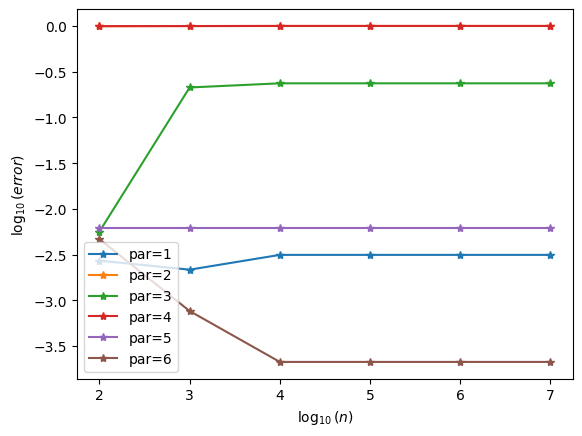

In [14]:
import  matplotlib.pyplot  as  plt

N = np.array([100,1000,10000,100000,1000000,10000000], dtype=int)
length_N = N.size
sum  = np.zeros((length_N,6), dtype=np.float32)
error  = np.zeros((length_N,6), dtype=np.float32)

# Berechnung der Summen und Fehler mit verschiedenen Parametern
for par in range(6) :
    for index_N in range(length_N) :
        n = N[index_N]
        sum[index_N,par] = summe(n,par+1)
        error[index_N,par] = abs (sum[index_N,par]-np.log(2.))
    print('par =', par+1, 'completed')
    
# Grafische Ausgabe
plt.figure('Partialsummenvergleich')
plt.plot(np.log10(N),np.log10(error),'*-')
plt.xlabel(r"$\log_{10}(n)$")
plt.ylabel(r"$\log_{10}(error)$")
plt.legend(['par=1','par=2','par=3','par=4','par=5','par=6'])
plt.show()